In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import re

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import re

def plot_saved_accuracy(csv_file: str, save_pdf: bool = False):
    """
    Load accuracy data CSV, print experiment parameters, plot results, and optionally save as PDF.

    Args:
        csv_file (str): Path to CSV file saved by compare_linear_vs_mle.
        save_pdf (bool): If True, saves the figure as a PDF in the same directory.
    """
    csv_path = Path(csv_file)
    if not csv_path.exists():
        raise FileNotFoundError(f"CSV file not found: {csv_path}")

    # Extract metadata from file name
    match = re.search(r"d(\d+)_k(\d+)_R(\d+)", csv_path.name)
    if not match:
        raise ValueError(f"Filename does not contain expected pattern: {csv_path.name}")

    d, k, R = map(int, match.groups())
    print(f"Parsed Parameters:\n - Dimension (d): {d}\n - Subspace (k): {k}\n - Radius (R): {R}")

    df = pd.read_csv(csv_path)

    # Determine min y for plotting
    acc_columns = ['linear_transformer', 'mle', 'proj_mle', 'svm']
    y_min = min(df[col].min() for col in acc_columns)
    y_min = max(0.0, y_min - 0.02)  # small margin below the lowest curve

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(df['context_size'], df['linear_transformer'], label='LinearTransformer', linewidth=2)
    plt.plot(df['context_size'], df['mle'], label='MLE (full)', linewidth=2)
    plt.plot(df['context_size'], df['proj_mle'], label=f'MLE (proj {k})', linewidth=2)
    plt.plot(df['context_size'], df['svm'], label='SVM', linewidth=2)
    plt.axhline(1.0, linestyle='--', color='gray', label='Optimal')

    plt.xlabel('Context Size (M)',fontsize=14)
    plt.ylabel('Test Accuracy',fontsize=14)
    plt.title(f"Accuracy vs Context Size ($R=\\tilde{{R}} = {R}$, $d={d}$, $k={k}$)", fontsize=18)
    plt.ylim(y_min, 1.01)
    plt.legend(fontsize=16)
    plt.grid(True, alpha=0.4, color='gray', linewidth=0.5)

    if save_pdf:
        pdf_path = csv_path.with_suffix('.pdf')
        plt.savefig(pdf_path, bbox_inches='tight', dpi=300)
        print(f"📄 PDF saved to {pdf_path}")
    
    plt.show()




Parsed Parameters:
 - Dimension (d): 2000
 - Subspace (k): 10
 - Radius (R): 2
📄 PDF saved to plots\compare_lt_mle_svm_k10\accuracy_data_d2000_k10_R2.pdf


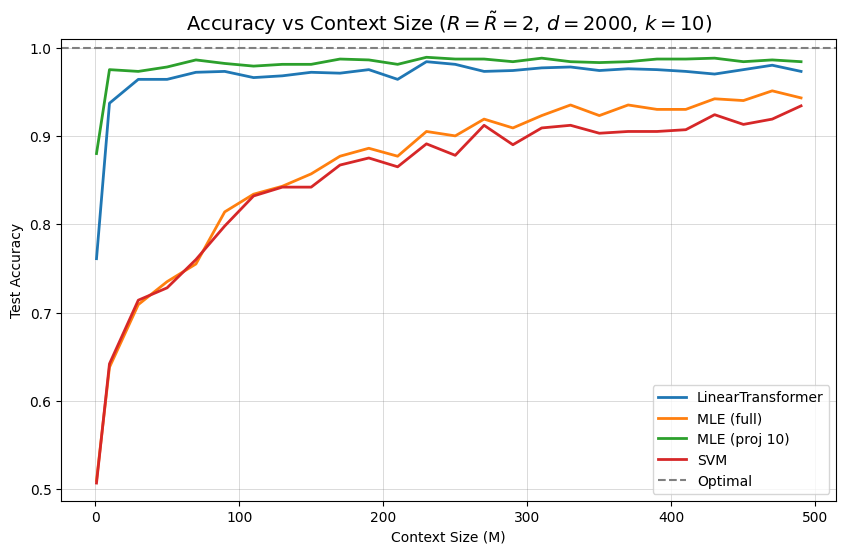

In [38]:
csv_file = 'plots\compare_lt_mle_svm_k10/accuracy_data_d2000_k10_R2.csv'

plot_saved_accuracy(csv_file,save_pdf=True)

In [39]:
print(1+1)

2
